In [1]:
file_path = '/Users/lfinkbeiner/Documents/GitHub/HERA/'
beam_origin = 'HERA_4.9m_E-pattern_151MHz.txt'
beam_destination = 'ant1_s2'

In [2]:
from RIMEz import beam_models
import numpy as np
from spin1_beam_model import cst_processing, jones_matrix_field

In [3]:
processor = cst_processing.CSTDataProcessor(
    [file_path + beam_origin,
    file_path + beam_origin,
    file_path + beam_origin],
    np.array([150e6, 151e6, 152e6]),
    1, 1e-4
)

In [4]:
processor.compute_spin1_harmonics()
processor.write_model_data(file_path, beam_destination)
spline_beam_func = beam_models.model_data_to_spline_beam_func(file_path + beam_destination + '.h5', np.array([150e6, 151e6, 152e6]))

//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [5]:
'''WE DO NOT WANT TO MULTIPLY BY THIS YET. WE CARE ABOUT J x J'''
S = .5 * np.array([
        [1, 1, 0, 0],
        [0, 0, 1, 1j],
        [0, 0, 1, -1j],
        [1, -1, 0, 0]
    ])
def A_matrix(freq, alt, az):
    ''' The recommendation is to put healpy ortho representation here
    This helps with interpolation? I don't know, recheck the Slack '''
    J = spline_beam_func(freq, alt, az)
    J_outer = np.kron(J, np.conj(J))
    return np.dot(S, np.dot(J_outer, np.linalg.inv(S)))

In [6]:
A = A_matrix(151e6, np.array([np.pi / 4]), np.array([np.pi]))

print('For the following results, I use altitude pi/4 and azimuth pi\n')

print('A Matrix, Full')
print(A)

# Here we can see that the journal criterion is NOT satisfied:
    # off-diagonal terms dominate the diagonal.
# Maybe that is just because we are using dummy data?
print('\nA Matrix, Magnitudes')
print(np.abs(A))

print('\nA Matrix, Real Components')
print(np.real(A))

print('\nA Matrix, Imaginary Components')
print(np.imag(A))

For the following results, I use altitude pi/4 and azimuth pi

A Matrix, Full
[[[-7.20266508e-07-6.07156038e-07j  4.93615423e-04-1.19490666e-03j
    4.93549352e-04+3.46835635e-04j -1.54006715e-07+3.23065006e-07j]]

 [[ 4.93409897e-04+9.74778890e-04j -1.48917287e-08-1.61965669e-08j
    5.11763584e-08-2.72520853e-08j -4.94284940e-04+1.25821129e-04j]]

 [[ 4.93446138e-04-1.25493571e-04j -5.11353449e-08+2.72696836e-08j
    1.49385636e-08+1.62141652e-08j -4.94321181e-04-9.74538265e-04j]]

 [[ 1.54732031e-07-3.23047407e-07j -4.94181726e-04-3.45916487e-04j
   -4.94115655e-04+1.19584792e-03j  7.21079672e-07+6.07138440e-07j]]]

A Matrix, Magnitudes
[[[9.42030943e-07 1.29284883e-03 6.03229575e-04 3.57895328e-07]]

 [[1.09254163e-03 2.20020990e-08 5.79801329e-08 5.10047604e-04]]

 [[5.09153933e-04 5.79522143e-08 2.20467647e-08 1.09273888e-03]]

 [[3.58192167e-07 6.03219525e-04 1.29390978e-03 9.42641490e-07]]]

A Matrix, Real Components
[[[-7.20266508e-07  4.93615423e-04  4.93549352e-04 -1.5400671

In [7]:
# Eventually: alt
x = np.linspace(0, np.pi, 100)
#print(x)

# Eventually: az
y = np.linspace(0, 2 * np.pi, 100)
#print(y)

A_mag_space = np.abs(A_matrix(151e6, x, y))
print(A_mag_space)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  ...
  [1.28770939e-06 1.08641398e-03 7.47586337e-04 5.00730997e-06]
  [1.57818467e-06 9.93777157e-04 7.07144596e-04 4.51382116e-06]
  [1.71356319e-06 8.72307925e-04 6.77257431e-04 3.97605751e-06]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  ...
  [4.01579551e-04 4.76838049e-08 1.75635729e-08 3.72217850e-04]
  [3.98390500e-04 4.45012472e-08 1.81365389e-08 3.30769540e-04]
  [3.73207386e-04 4.03886319e-08 1.74449053e-08 2.92314047e-04]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  ...
  [2.41089705e-04 

In [8]:
# to-do:
    # 1. see if we need radians or degrees
    # 2. convert hra-dec to az, alt
    # 3. combine plots for multiple Stokes parameters

import matplotlib.pyplot as plt

I_to_I = A_mag_space[0, :, 0]

# to scale the colors properly, we calculate the corresponding fraction of the range
scaled_I_to_I = (I_to_I - I_to_I.min()) / I_to_I.ptp()

# this is the closest pre-built scheme I could find to that used in the papers
colors = plt.cm.viridis(scaled_I_to_I)

# debug
print(scaled_I_to_I.shape)

(10000,)


[[0.         0.        ]
 [0.         0.06346652]
 [0.         0.12693304]
 ...
 [3.14159265 6.15625227]
 [3.14159265 6.21971879]
 [3.14159265 6.28318531]]


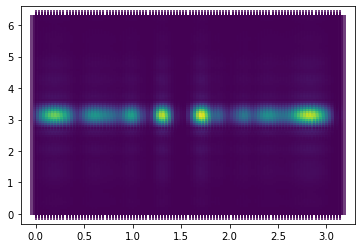

In [9]:
# This reshaping is hard-coded
# I have also not tested this extensively; it was nabbed from Stack Exchange
cart_prod = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)

print(cart_prod)

plt.scatter(cart_prod[:, 0], cart_prod[:, 1], marker='+', c=colors, s=150, linewidths=4)
plt.show()

In [13]:
'''
healpy pix to get angle: use your altitude and azimuth
healpy orth view 
    healpix maps in general

We can start with Healpix IQ Stokes parameters.
    (There was another option but I forgot it.)
'''
import healpy as hp

//anaconda3/envs/hera/lib/python3.7/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


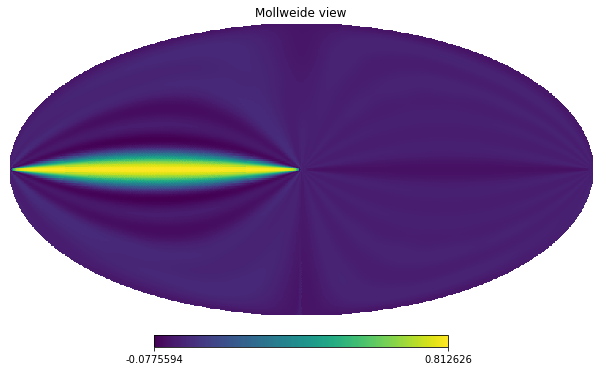

In [14]:
#nside = 16, 32, 64, 128...
nside = 128

theta, phi = hp.pix2ang(nside,np.arange(12 * nside * nside))
alt = np.pi - theta
az = phi
J = spline_beam_func(150e6, az, alt)
hp.mollview(J[:,1,0], rot=[0, 90])

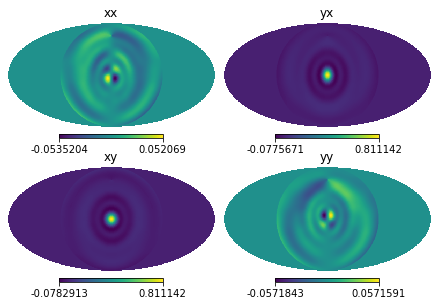

In [90]:
# Here we plot Mollweide views
alt = np.pi/2 - theta
J = spline_beam_func(150e6, alt, az)
# It is possible that I assigned the indices to the wrong titles
hp.mollview(J[:, 0, 0], rot=[0, 90], sub=[2, 2, 1], title='xx')
hp.mollview(J[:, 1, 0], rot=[0, 90], sub=[2, 2, 2], title='yx')
hp.mollview(J[:, 0, 1], rot=[0, 90], sub=[2, 2, 3], title='xy')
hp.mollview(J[:, 1, 1], rot=[0, 90], sub=[2, 2, 4], title='yy')

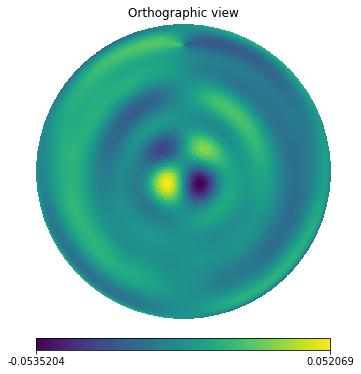

In [19]:
hp.orthview(J[:, 0, 0], rot=[0, 90], half_sky=True)

//anaconda3/envs/hera/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


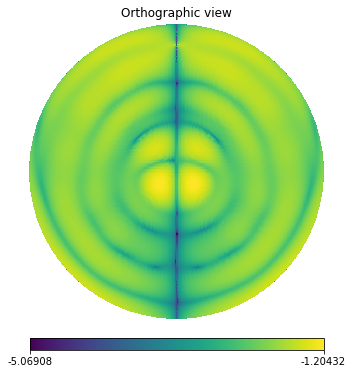

In [20]:
hp.orthview(np.log10(J[:, 0, 0]), rot=[0, 90], half_sky=True)

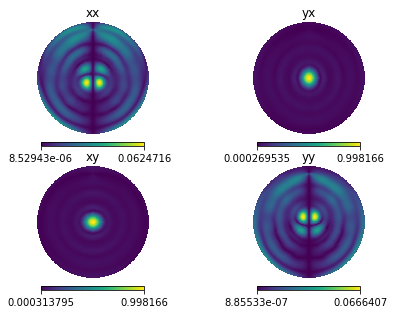

In [91]:
# It is possible that I assigned the indices to the wrong titles
hp.orthview(np.abs(J[:, 0, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 1], title='xx')
hp.orthview(np.abs(J[:, 1, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 2], title='yx')
hp.orthview(np.abs(J[:, 0, 1]), rot=[0, 90], half_sky=True, sub=[2, 2, 3], title='xy')
hp.orthview(np.abs(J[:, 1, 1]), rot=[0, 90], half_sky=True, sub=[2, 2, 4], title='yy')

In [86]:
# These should be appropriate margins, but it appears
    # that something breaks in the coordinate conversion...
hp.orthview(np.abs(J[:, 0, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 1], margins=[.15, .15, .95, .9])

ValueError: Width and height specified must be non-negative

<Figure size 432x288 with 0 Axes>

In [ ]:
hp.orthview(np.abs(J[:, 1, 1]), rot=[0, 90], half_sky=True, fig=2, sub=[2, 2, 2])
#https://healpix.sourceforge.io/
# another huge to-do: figure out how to get four plots side-by-side